<a href="https://colab.research.google.com/github/highRisk911/Lab1/blob/main/LR5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №5
Іщенка Дмитра 

In [ ]:
import zipfile
import random
import os
import pathlib


import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-04-10 13:51:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.4’

pizza_steak.zip.4   100%[===================>] 104.47M   244MB/s    in 0.4s    

2022-04-10 13:52:00 (244 MB/s) - ‘pizza_steak.zip.4’ saved [109540975/109540975]



In [ ]:

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Image shape: (289, 512, 3)


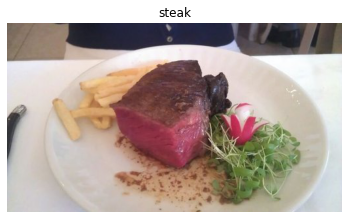

In [ ]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")

    return img

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 7, strides=4, activation="selu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(64, 3, activation="selu"),
    tf.keras.layers.MaxPool2D(2, padding="valid"),

    tf.keras.layers.Conv2D(128, 3, activation="selu"),
    tf.keras.layers.MaxPool2D(2, padding="valid"),
    tf.keras.layers.Conv2D(128, 3, activation="selu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="selu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 55, 55, 32)        4736      
                                                                 
 conv2d_5 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 128)      

In [ ]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience=5, verbose=True),
    tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True),
]

history = model.fit(
    train_data,
    epochs=50,
    batch_size=32,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data),
    callbacks=callbacks,
)

print('\n'*5)
loss, accuracy = model.evaluate(valid_data)
print(f'loss: {loss}\naccuracy: {accuracy}')

Epoch 1/50
47/47 [==============================] - 11s 229ms/step - loss: 0.7130 - accuracy: 0.6587 - val_loss: 0.5491 - val_accuracy: 0.7420 - lr: 0.0010
Epoch 2/50
47/47 [==============================] - 10s 219ms/step - loss: 0.5710 - accuracy: 0.7167 - val_loss: 0.5643 - val_accuracy: 0.6980 - lr: 0.0010
Epoch 3/50
47/47 [==============================] - 11s 231ms/step - loss: 0.5070 - accuracy: 0.7500 - val_loss: 0.4072 - val_accuracy: 0.8360 - lr: 0.0010
Epoch 4/50
47/47 [==============================] - 10s 220ms/step - loss: 0.4551 - accuracy: 0.7833 - val_loss: 0.3664 - val_accuracy: 0.8380 - lr: 0.0010
Epoch 5/50
47/47 [==============================] - 10s 219ms/step - loss: 0.4015 - accuracy: 0.8213 - val_loss: 0.3763 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 6/50
47/47 [==============================] - 10s 220ms/step - loss: 0.3868 - accuracy: 0.8307 - val_loss: 0.3131 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 7/50
47/47 [==============================] - 10s 220ms/st

### Висновок

При виконанні Ларбораторної роботи 5, ми підготували тренувальний та валідаційний датасети для класифікації їжі.
 Застосували згорткові нейронні мережі для класифікації зображень.